<a href="https://colab.research.google.com/github/hbgit/walletstockanalysis/blob/main/ReviewMyWalletStonks_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
import yfinance as yf
import pandas as pd

In [ ]:
PRIO3 = yf.Ticker("PRIO3.SA")
print(PRIO3.info.keys())

dict_keys(['zip', 'sector', 'longBusinessSummary', 'city', 'phone', 'state', 'country', 'companyOfficers', 'website', 'maxAge', 'address1', 'industry', 'address2', 'ebitdaMargins', 'profitMargins', 'grossMargins', 'operatingCashflow', 'revenueGrowth', 'operatingMargins', 'ebitda', 'targetLowPrice', 'recommendationKey', 'grossProfits', 'freeCashflow', 'targetMedianPrice', 'currentPrice', 'earningsGrowth', 'currentRatio', 'returnOnAssets', 'numberOfAnalystOpinions', 'targetMeanPrice', 'debtToEquity', 'returnOnEquity', 'targetHighPrice', 'totalCash', 'totalDebt', 'totalRevenue', 'totalCashPerShare', 'financialCurrency', 'revenuePerShare', 'quickRatio', 'recommendationMean', 'exchange', 'shortName', 'longName', 'exchangeTimezoneName', 'exchangeTimezoneShortName', 'isEsgPopulated', 'gmtOffSetMilliseconds', 'quoteType', 'symbol', 'messageBoardId', 'market', 'annualHoldingsTurnover', 'enterpriseToRevenue', 'beta3Year', 'enterpriseToEbitda', '52WeekChange', 'morningStarRiskRating', 'forwardEps

**Stock Wallet**

In [3]:
stock_list = ['ABBV','PEP','PLD','KO','STOR','PRU','MSFT','VZ','T','GOOGL','AMZN','WBD']

In [4]:
#earningsGrowth; yield; totalRevenue
metric = [
    'marketCap',
    'revenueGrowth',
    'priceToSalesTrailing12Months',
    'pegRatio',
    'returnOnAssets',
    'returnOnEquity',
    'profitMargins',
    'currentRatio',
    'debtToEquity',
    'payoutRatio',
    'recommendationMean',
    'recommendationKey',
    'totalDebt',
    'sector',
    'morningStarRiskRating',
    'ytdReturn',
    'yield',
    'averageVolume',
    'earningsGrowth',
    'totalRevenue'
]

In [5]:
df = pd.DataFrame(index=stock_list,columns=metric)

In [6]:
def get_fundamental_data(df):
  for symbol in df.index:
    get_sym_info = yf.Ticker(symbol)
    print("Getting symbol: " + symbol)
    try:
      for metric in df.columns:        
        get_sym_info.info[metric]
        df.loc[symbol,metric] = get_sym_info.info[metric]
    except Exception as e:
      print (symbol, 'not found')
  return df
      

In [7]:
# Defining rules to check fundamentals
# gt -> great than >= 
rulesFundmentals_gt = {
    'marketCap' : 200000000000,
    'revenueGrowth' : 0.052,
    'priceToSalesTrailing12Months' : 2.0000,
    'pegRatio' : 2.0,
    'returnOnAssets' : 0.08000,
    'returnOnEquity' : 0.20000,
    'profitMargins' : 0.11282,
    'currentRatio' : 1.0,
    'debtToEquity' : 11.00,
    'recommendationMean' : 1.5,    
    'averageVolume' : 1700000
}

In [8]:
df = get_fundamental_data(df)

Getting symbol: ABBV
Getting symbol: PEP
Getting symbol: PLD
Getting symbol: KO
Getting symbol: STOR
Getting symbol: PRU
Getting symbol: MSFT
Getting symbol: VZ
Getting symbol: T
Getting symbol: GOOGL
Getting symbol: AMZN
Getting symbol: WBD


In [9]:
#df.sort_values('totalRevenue')

,marketCap,revenueGrowth,priceToSalesTrailing12Months,pegRatio,returnOnAssets,returnOnEquity,profitMargins,currentRatio,debtToEquity,payoutRatio,recommendationMean,recommendationKey,totalDebt,sector,morningStarRiskRating,ytdReturn,yield,averageVolume,earningsGrowth,totalRevenue
STOR,8884852736,0.163,10.414198,4.34,0.03037,0.0627,0.38502,1.975,87.962,1.2941,3.1,hold,4715901952,Real Estate,None,None,None,4782248,0.391,853148032
PLD,94097432576,0.089,17.578997,-4.94,0.02311,0.10523,0.69764,1.048,47.653,0.568,1.9,buy,18524532736,Real Estate,None,None,None,3640257,0.017,5352833024
WBD,29178888192,2.209,1.51006,-2.44,-0.00188,-0.07984,-0.14325,1.07,105.354,0,2.6,hold,55781998592,Communication Services,None,None,None,23683007,None,19323000832
KO,237984382976,0.118,5.759266,4.26,0.08098,0.39211,0.23162,1.127,172.628,0.7818,2.1,buy,42816999424,Consumer Defensive,None,None,None,12835578,-0.279,41322000384
ABBV,248046731264,0.045,4.325214,-18.12,0.08139,0.92706,0.22035,0.844,498.284,0.7666,2.2,buy,73187999744,Healthcare,None,None,None,5549728,0.214,57349001216
PRU,33255370752,-0.179,0.517183,-2.74,0.0028,0.04732,0.03331,1.194,118.089,0.8545,2.9,hold,34148999168,Financial Services,None,None,None,1742703,None,64300998656
PEP,224677036032,0.052,2.744583,3.11,0.08261,0.54608,0.11282,0.831,210.34,0.6589,2.5,buy,39279001600,Consumer Defensive,None,None,None,4366265,-0.394,81862000640
VZ,158917017600,0.001,1.183078,2.27,0.04631,0.26241,0.15484,0.762,205.118,0.5141,3,hold,179184992256,Communication Services,None,None,None,20619707,-0.116,134325002240
T,109170319360,-0.171,0.69712,-1.3,0.04205,0.11311,0.12725,0.701,119.978,0.7058,2.7,hold,162337996800,Communication Services,None,None,None,39364714,1.518,156602007552
MSFT,1840532553728,0.124,9.282961,1.65,0.14919,0.47151,0.36686,1.785,47.075,0.2508,1.7,buy,78399995904,Technology,None,None,None,25031471,0.031,198269992960


In [10]:
df

,marketCap,revenueGrowth,priceToSalesTrailing12Months,pegRatio,returnOnAssets,returnOnEquity,profitMargins,currentRatio,debtToEquity,payoutRatio,recommendationMean,recommendationKey,totalDebt,sector,morningStarRiskRating,ytdReturn,yield,averageVolume,earningsGrowth,totalRevenue
ABBV,248046731264,0.045,4.325214,-18.12,0.08139,0.92706,0.22035,0.844,498.284,0.7666,2.2,buy,73187999744,Healthcare,None,None,None,5549728,0.214,57349001216
PEP,224677036032,0.052,2.744583,3.11,0.08261,0.54608,0.11282,0.831,210.34,0.6589,2.5,buy,39279001600,Consumer Defensive,None,None,None,4366265,-0.394,81862000640
PLD,94097432576,0.089,17.578997,-4.94,0.02311,0.10523,0.69764,1.048,47.653,0.568,1.9,buy,18524532736,Real Estate,None,None,None,3640257,0.017,5352833024
KO,237984382976,0.118,5.759266,4.26,0.08098,0.39211,0.23162,1.127,172.628,0.7818,2.1,buy,42816999424,Consumer Defensive,None,None,None,12835578,-0.279,41322000384
STOR,8884852736,0.163,10.414198,4.34,0.03037,0.0627,0.38502,1.975,87.962,1.2941,3.1,hold,4715901952,Real Estate,None,None,None,4782248,0.391,853148032
PRU,33255370752,-0.179,0.517183,-2.74,0.0028,0.04732,0.03331,1.194,118.089,0.8545,2.9,hold,34148999168,Financial Services,None,None,None,1742703,None,64300998656
MSFT,1840532553728,0.124,9.282961,1.65,0.14919,0.47151,0.36686,1.785,47.075,0.2508,1.7,buy,78399995904,Technology,None,None,None,25031471,0.031,198269992960
VZ,158917017600,0.001,1.183078,2.27,0.04631,0.26241,0.15484,0.762,205.118,0.5141,3,hold,179184992256,Communication Services,None,None,None,20619707,-0.116,134325002240
T,109170319360,-0.171,0.69712,-1.3,0.04205,0.11311,0.12725,0.701,119.978,0.7058,2.7,hold,162337996800,Communication Services,None,None,None,39364714,1.518,156602007552
GOOGL,1327790555136,0.126,4.773838,2.2,0.14927,0.29216,0.25892,2.809,11.28,0,1.8,buy,28810000384,Communication Services,None,None,None,29457689,-0.113,278139011072


In [20]:
# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
def check_peformace_last_3years(list_symbol):
    data = yf.download(list_symbol,'2019-1-1')['Adj Close']

    # Short data %
    # Calculating Percentage
    dict_percent = {}

    for symbol in data.columns:            
      dict_percent[symbol] = data[symbol].sum()

    a1_sorted_keys = sorted(dict_percent, key=dict_percent.get, reverse=True)
    
    print(a1_sorted_keys)
    print(data.head())
    

    # Plot all the close prices
    ((data.pct_change()+1).cumprod()).plot(figsize=(10, 7))
    
    # Show the legend
    plt.legend()

    # Define the label for the title of the figure
    plt.title("Returns", fontsize=16)

    # Define the labels for x-axis and y-axis
    plt.ylabel('Cumulative Returns', fontsize=14)
    plt.xlabel('Year', fontsize=14)

    # Plot the grid lines
    plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
    plt.show()
    

In [61]:
import json

rules_broken_by_symbol = []
metric_broken_by_symbol = {}
def check_fundamentals_data(df):
  for symbol in df.index:
    count_broken_rules = 0
    tmp_metrics = []
    #print("Checking symbol: " + symbol)  
    #print(">>> Rule broken: " + str(rulesFundmentals_gt.get('marketCap')) )      
    
    for metric in df.columns:                                               
      if metric in rulesFundmentals_gt:                        
        if df.loc[symbol,metric] is not None:                        
          if df.loc[symbol,metric] < rulesFundmentals_gt[metric]:
            count_broken_rules += 1 
            tmp_metrics.append(df.loc[symbol,metric])
            tmp_metrics.append(rulesFundmentals_gt[metric])              
            metric_broken_by_symbol[symbol] = tmp_metrics
          if metric == "payoutRatio":
            if df.loc[symbol,metric] > 1.0:
              count_broken_rules += 1
              tmp_metrics.append(df.loc[symbol,metric])
              tmp_metrics.append(rulesFundmentals_gt[metric])              
              metric_broken_by_symbol[symbol] = tmp_metrics
          if metric == "recommendationKey":
            if df.loc[symbol,metric] ==  "sell":
              count_broken_rules += 1
              tmp_metrics.append(df.loc[symbol,metric])
              tmp_metrics.append(rulesFundmentals_gt[metric])              
              metric_broken_by_symbol[symbol] = tmp_metrics

      if count_broken_rules >= 3: # number of rules that was broken        
        rules_broken_by_symbol.append(symbol)
      else:
        if symbol in metric_broken_by_symbol.keys():
          metric_broken_by_symbol.pop(symbol) 
    
    #try:      
    #except Exception as e:
    #  print (symbol, 'not found')

  print("Stocks that broken the rules: ")  
  print(json.dumps(metric_broken_by_symbol, sort_keys=True, indent=4))
  check_peformace_last_3years(rules_broken_by_symbol)


Stocks that broken the rules: 
{
    "ABBV": [
        0.045,
        0.052,
        -18.12,
        2.0,
        0.844,
        1.0
    ],
    "AMZN": [
        0.02451,
        0.08,
        0.094289996,
        0.2,
        0.02389,
        0.11282,
        0.953,
        1.0
    ],
    "PLD": [
        94097432576,
        200000000000,
        -4.94,
        2.0,
        0.02311,
        0.08,
        0.105229996,
        0.2
    ],
    "PRU": [
        33255370752,
        200000000000,
        -0.179,
        0.052,
        0.5171828,
        2.0,
        -2.74,
        2.0,
        0.0028,
        0.08,
        0.047319997,
        0.2,
        0.03331,
        0.11282
    ],
    "STOR": [
        8884852736,
        200000000000,
        0.030369999,
        0.08,
        0.0627,
        0.2
    ],
    "T": [
        109170319360,
        200000000000,
        -0.171,
        0.052,
        0.69711953,
        2.0,
        -1.3,
        2.0,
        0.04205,
        0.08,
    

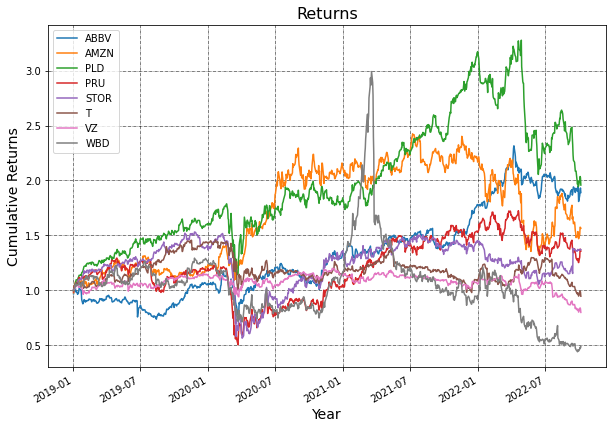

In [62]:
check_fundamentals_data(df)

In [ ]:
# Short wallet by earningsGrowth; yield; totalRevenue

In [ ]:
# TODO: ETFs analysis

In [ ]:
# https://kernc.github.io/backtesting.py/doc/examples/Parameter%20Heatmap.html
# https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec
# 